In [110]:
import os
from md_diffusion import *
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [3]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
thermo_avg = {}

In [4]:
ALL_DATA = {}
for sim_type in ['flexible', 'rigid']:
    DATA = {}
    simdir = '%s/%s' % (data_dir, sim_type)
    for molecule in os.listdir(simdir):
        mol_simdir = os.path.join(simdir, molecule)
        DATA[molecule.split('_')[0]] = read_lammps_out(mol_simdir, var=['temp', 'emol', 'epair'], t_skip=0, dt_step=1, dt_frame=1000, log='log.%s' % molecule)
    ALL_DATA[sim_type] = DATA

### Read molecule diffusion info

In [6]:
with open('diff_data.yaml', 'r') as f:
    diff_data = yaml.load(f)

#### Sort molecules according to molecular weight

In [7]:
molecules = list(diff_data['mw'].keys())
mol_order = np.argsort([diff_data['mw'][i] for i in molecules])
molecules = [molecules[i] for i in mol_order]
mw = [diff_data['mw'][i] for i in molecules]
D = {}
for stype in ['flexible', 'rigid', 'dctst']:
    D[stype] = [diff_data[stype][i] for i in molecules]
colors = dict(rigid='#CF5955', y='#EAC658', g='#66AD9B', flexible='#4e7fad')
shades = dict(rigid='#672C2A', y='#75632C', g='#33564D', flexible='#3B4C5C')

### Plot energy vs time for each molecule

<p align="center"><img src="/assets/img/presentations/nanocar/md-thermo-epair-t0.png" height=250></p>


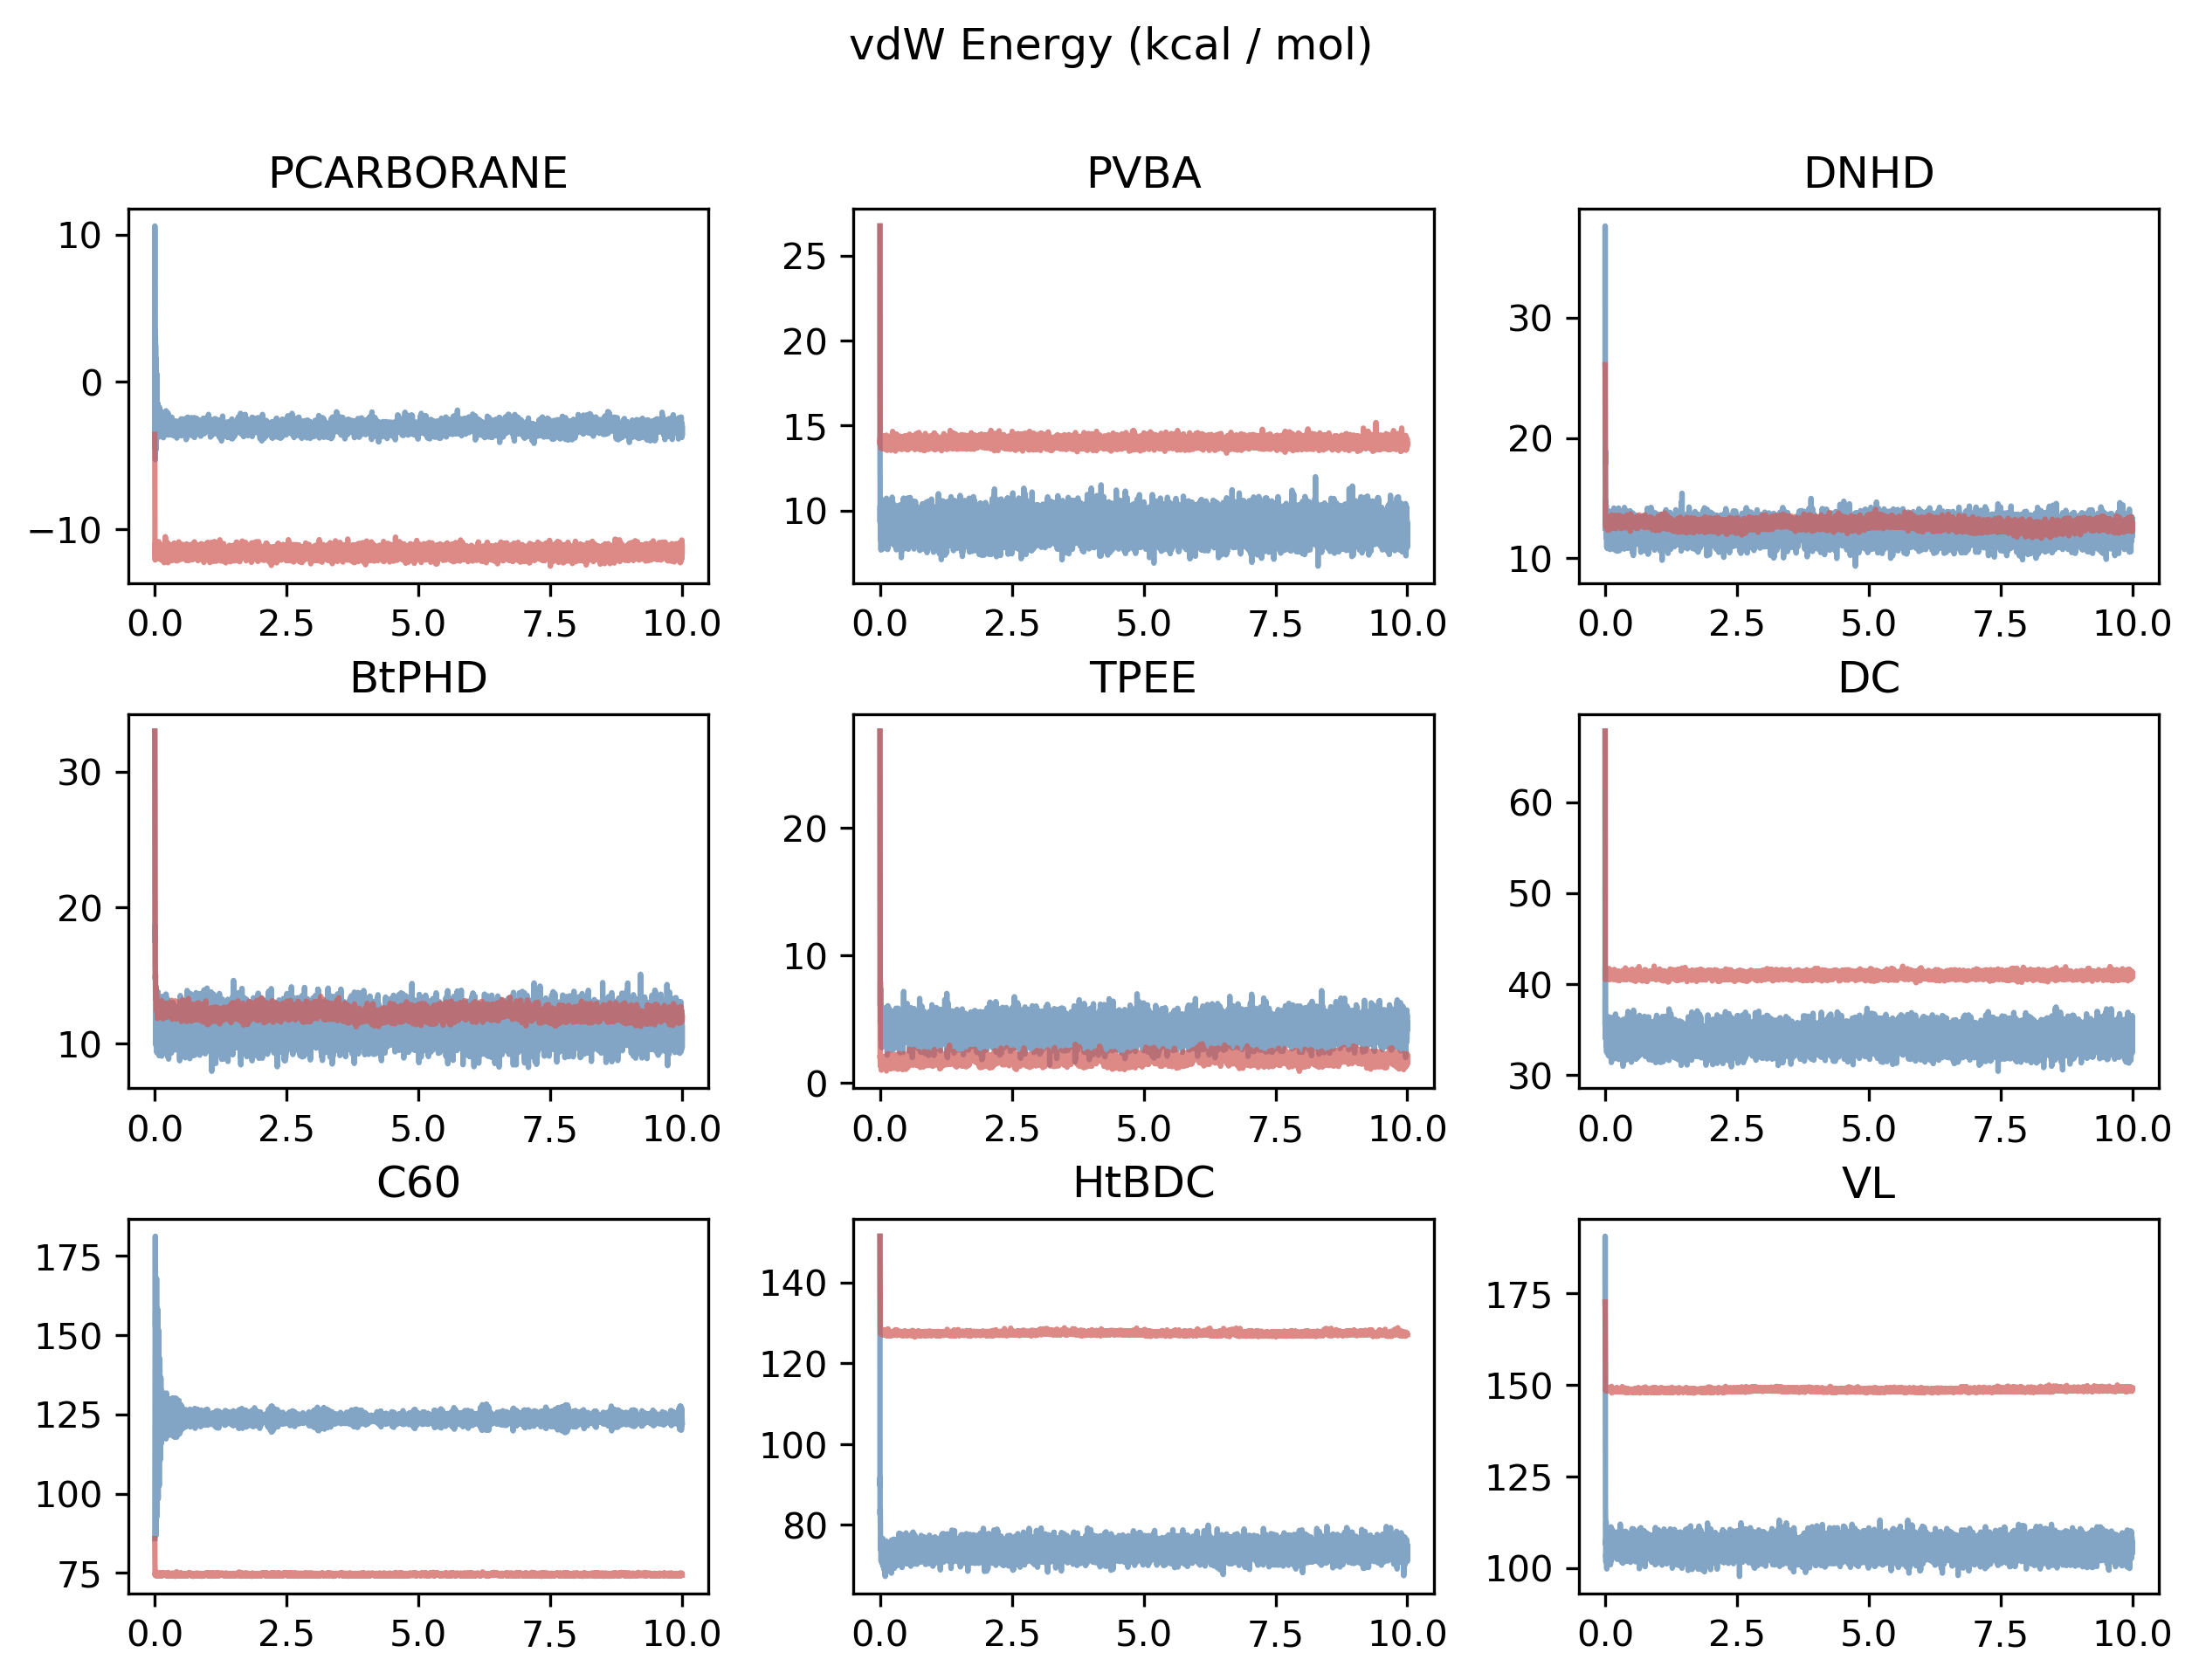

In [75]:
yvar = 'epair'
t_skip = 0
titles  = dict(epair='vdW Energy (kcal / mol)', emol='Molecular Energy (kcal / mol)')

runs = sorted(list(ALL_DATA[sim_type]['DC'].keys()))
thermo_avg[yvar] = {}
fig = plt.figure(figsize=(10, 7), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
for midx, mol in enumerate(molecules, start=1):
    ax = fig.add_subplot(3, 3, midx)
    thermo_avg[yvar][mol] = {}
    for sim_type in ['flexible', 'rigid']:
        runs = sorted(list(ALL_DATA[sim_type][mol].keys()))
        yavg = np.average([ALL_DATA[sim_type][mol][run][yvar] for run in runs], axis=0)[t_skip:]
        time = ALL_DATA[sim_type][mol][runs[0]]['time'][t_skip:]
        ax.plot(time, yavg, alpha=0.7, c=colors[sim_type])
        thermo_avg[yvar][mol][sim_type] = np.average(yavg)
    ax.set_title(mol)
plt.suptitle(titles[yvar])

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-thermo-%s-t%i.png' % (yvar, t_skip)
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Plot $\Delta E$ vs $\Delta D$ 

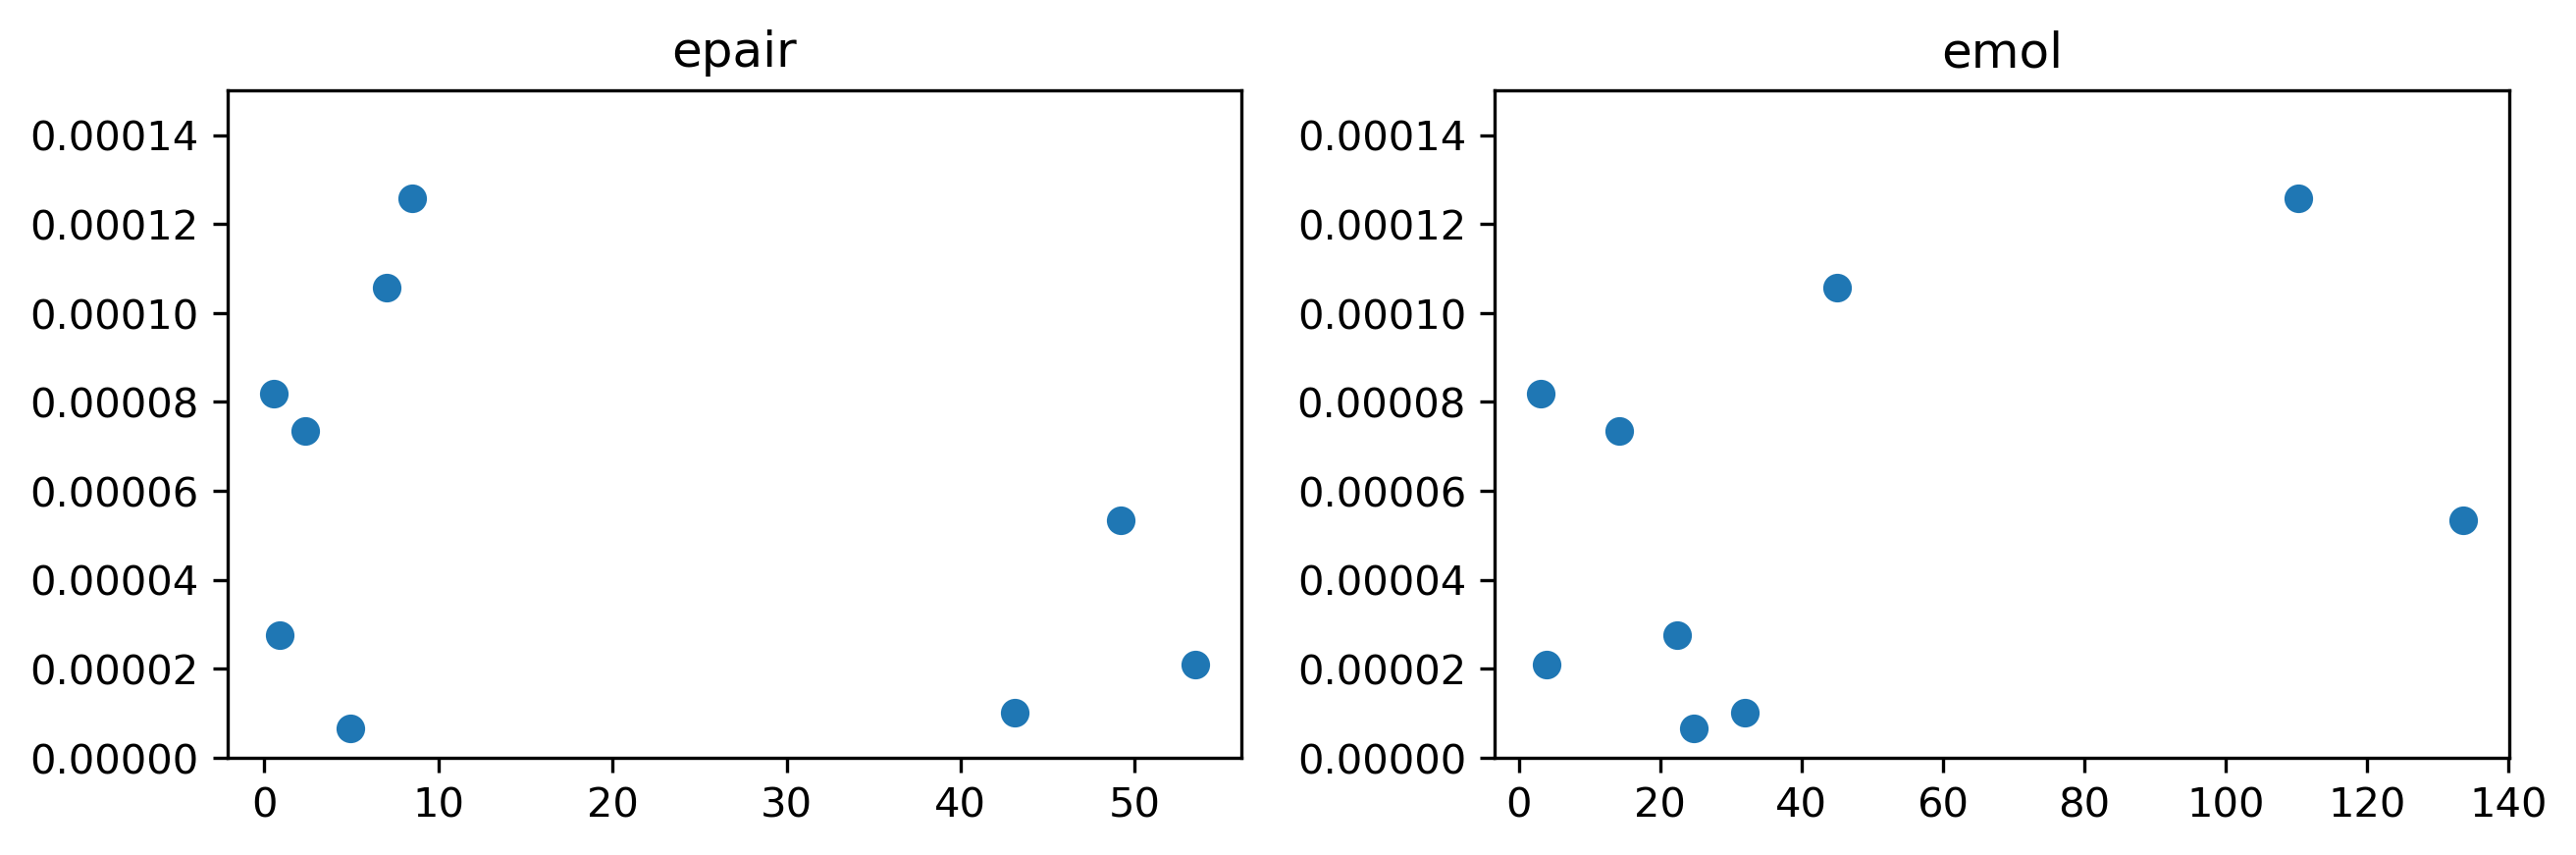

In [54]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)

for eidx, etype in enumerate(['epair', 'emol'], start=1):
    deltaE, deltaD = [], []
    for midx, mol in enumerate(molecules):
        e_flex = np.average([ALL_DATA['flexible'][mol][str(run)][etype] for run in range(10)], axis=0)
        e_flex = np.average(e_flex[2000:])
        e_rigid = np.average([ALL_DATA['rigid'][mol][str(run)][etype] for run in range(10)], axis=0)
        e_rigid = np.average(e_rigid[2000:])
        deltaE.append(abs(e_rigid - e_flex))
        deltaD.append(abs(D['rigid'][midx] - D['flexible'][midx]))
    ax = fig.add_subplot(1, 2, eidx)
    ax.scatter(deltaE, deltaD)
    ax.set_ylim(0, 1.5e-4)
    ax.set_title(etype)

### Plot energy vs diffusion

<p align="center"><img src="/assets/img/presentations/nanocar/md-thermo-energy-vs-diffusion.png" height=250></p>


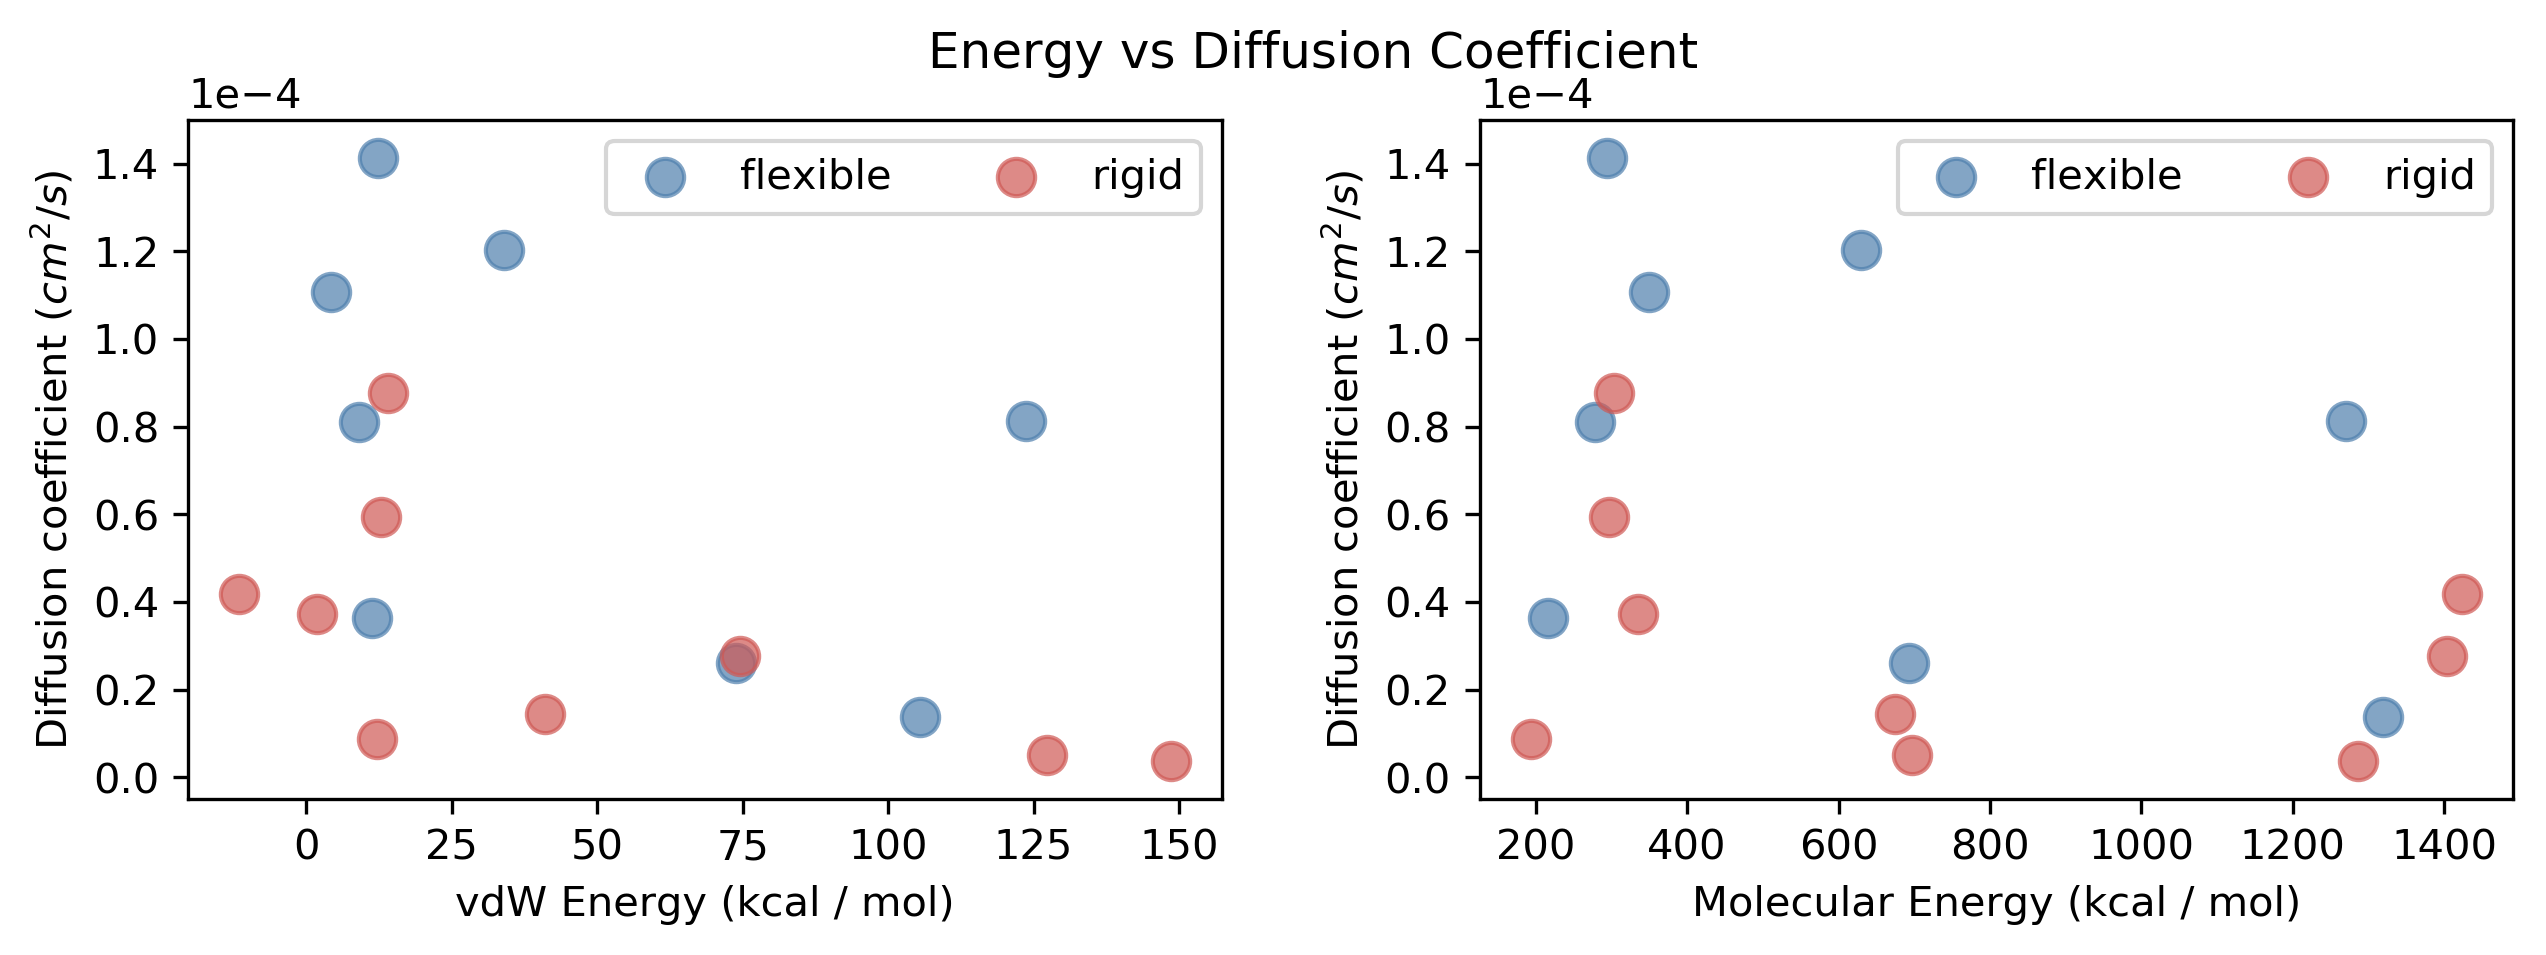

In [92]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
labels = dict(epair='vdW Energy (kcal / mol)', emol='Molecular Energy (kcal / mol)')

for eidx, etype in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, eidx)
    for sim_type in ['flexible', 'rigid']:
        e_mol = []
        for midx, mol in enumerate(molecules):
            e_avg = np.average([ALL_DATA[sim_type][mol][str(run)][etype] for run in range(10)], axis=0)
            e_avg = np.average(e_avg[2000:])
            e_mol.append(e_avg)
        ax.scatter(e_mol, D[sim_type], c=colors[sim_type], alpha=0.7, s=80)
        ax.set_ylim(-5e-6, 1.5e-4)
        ax.legend(['flexible', 'rigid'], ncol=2)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
        ax.set_xlabel(labels[etype])
plt.suptitle('Energy vs Diffusion Coefficient')

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-thermo-energy-vs-diffusion.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Plot Energy vs Molecular Weight

<p align="center"><img src="/assets/img/presentations/nanocar/md-thermo-mw-vs-energy.png" height=250></p>


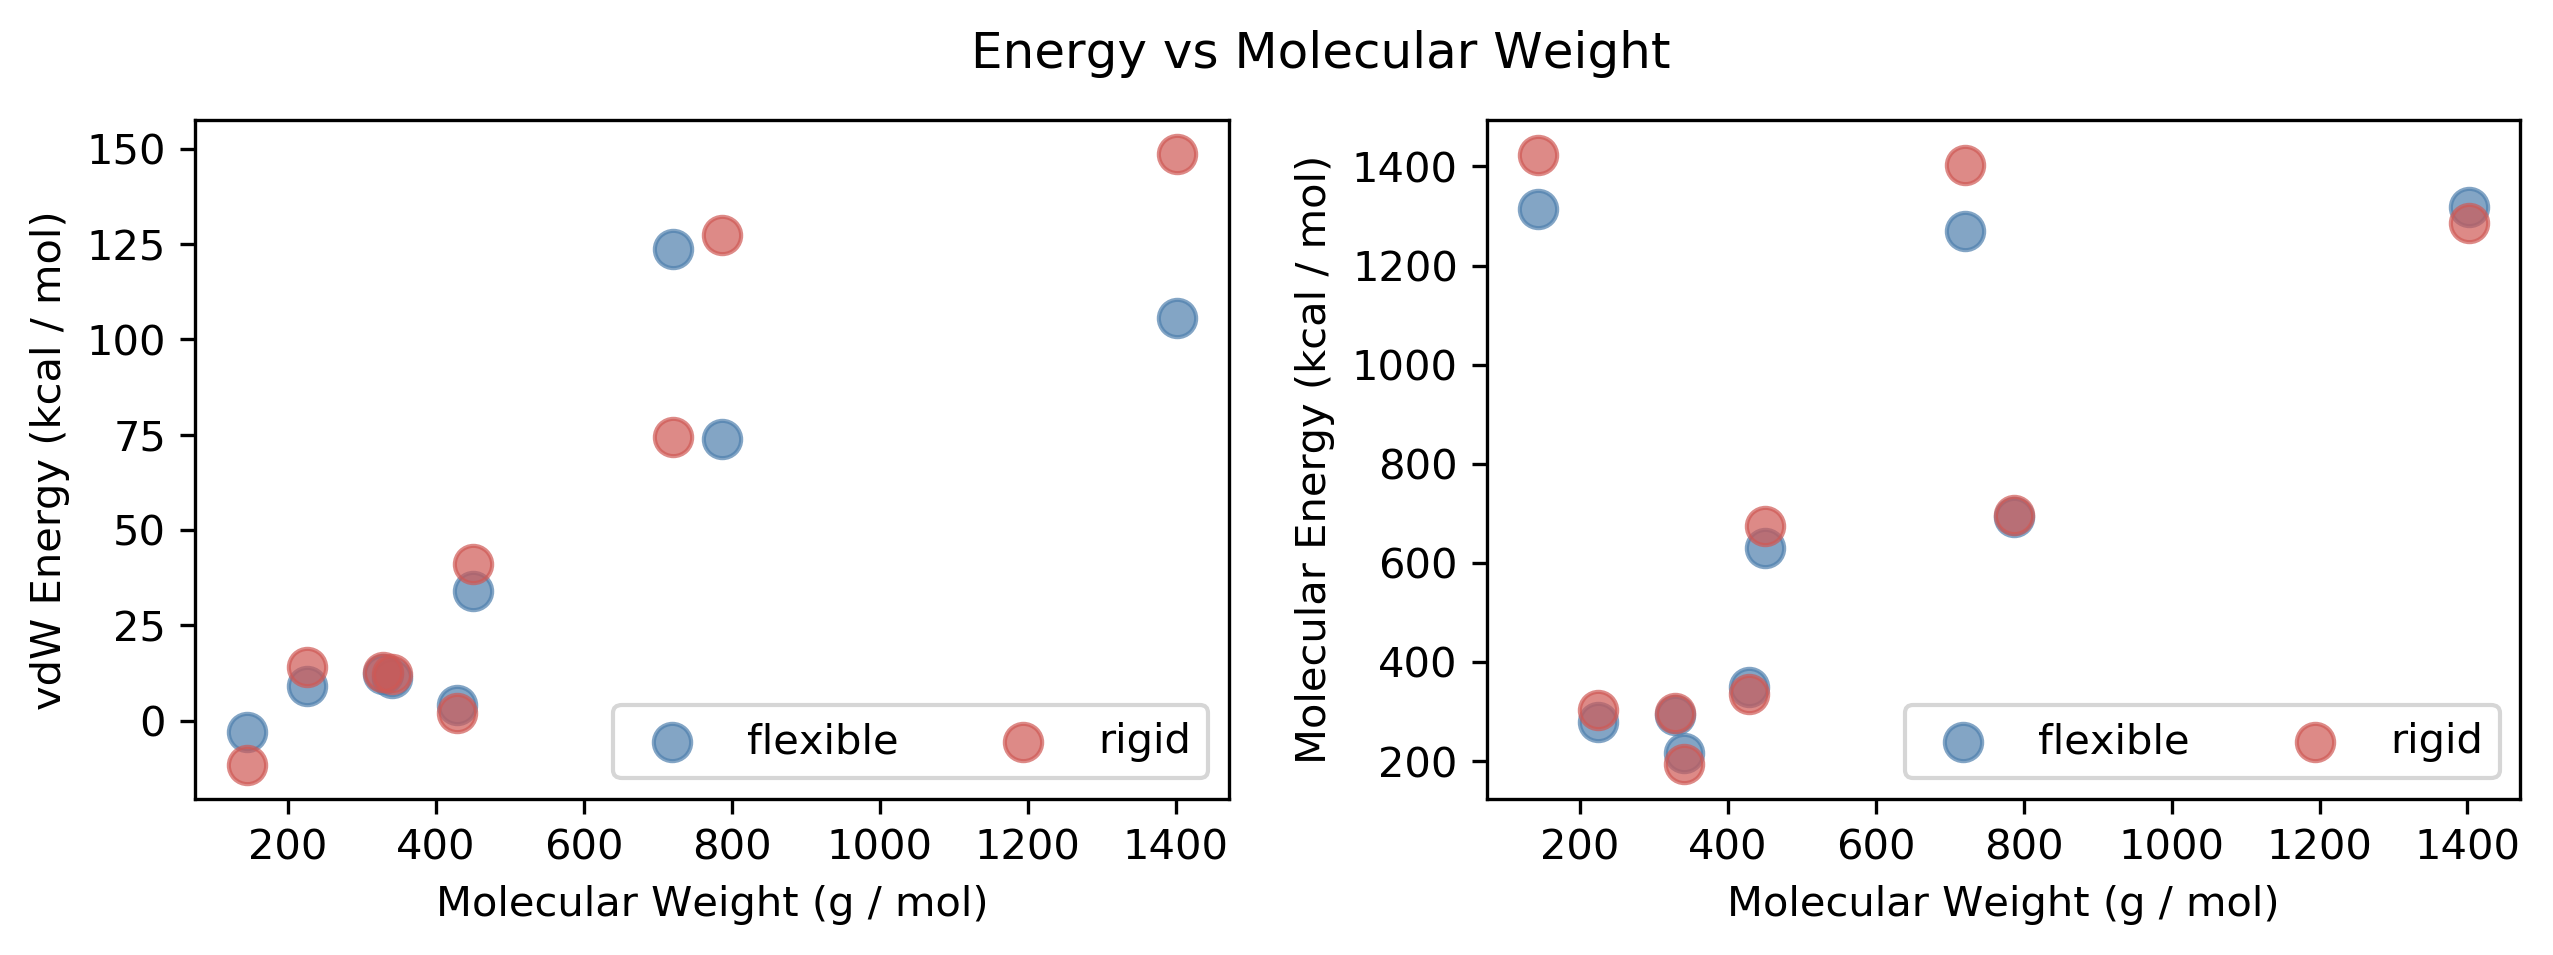

In [91]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
labels = dict(epair='vdW Energy (kcal / mol)', emol='Molecular Energy (kcal / mol)')

for eidx, etype in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, eidx)
    for sim_type in ['flexible', 'rigid']:
        e_mol = []
        for midx, mol in enumerate(molecules):
            e_avg = np.average([ALL_DATA[sim_type][mol][str(run)][etype] for run in range(10)], axis=0)
            e_avg = np.average(e_avg[2000:])
            e_mol.append(e_avg)
        ax.scatter(mw, e_mol, c=colors[sim_type], alpha=0.7, s=80)
        # ax.set_ylim(-5e-6, 1.5e-4)
        ax.legend(['flexible', 'rigid'], ncol=2, loc=4)
        ax.set_xlabel('Molecular Weight (g / mol)')
        ax.set_ylabel(labels[etype])
plt.suptitle('Energy vs Molecular Weight')

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-thermo-mw-vs-energy.png'
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Energy vs diffusion

Text(0.5,0.98,'Energy vs dcTST diffusion coefficient')

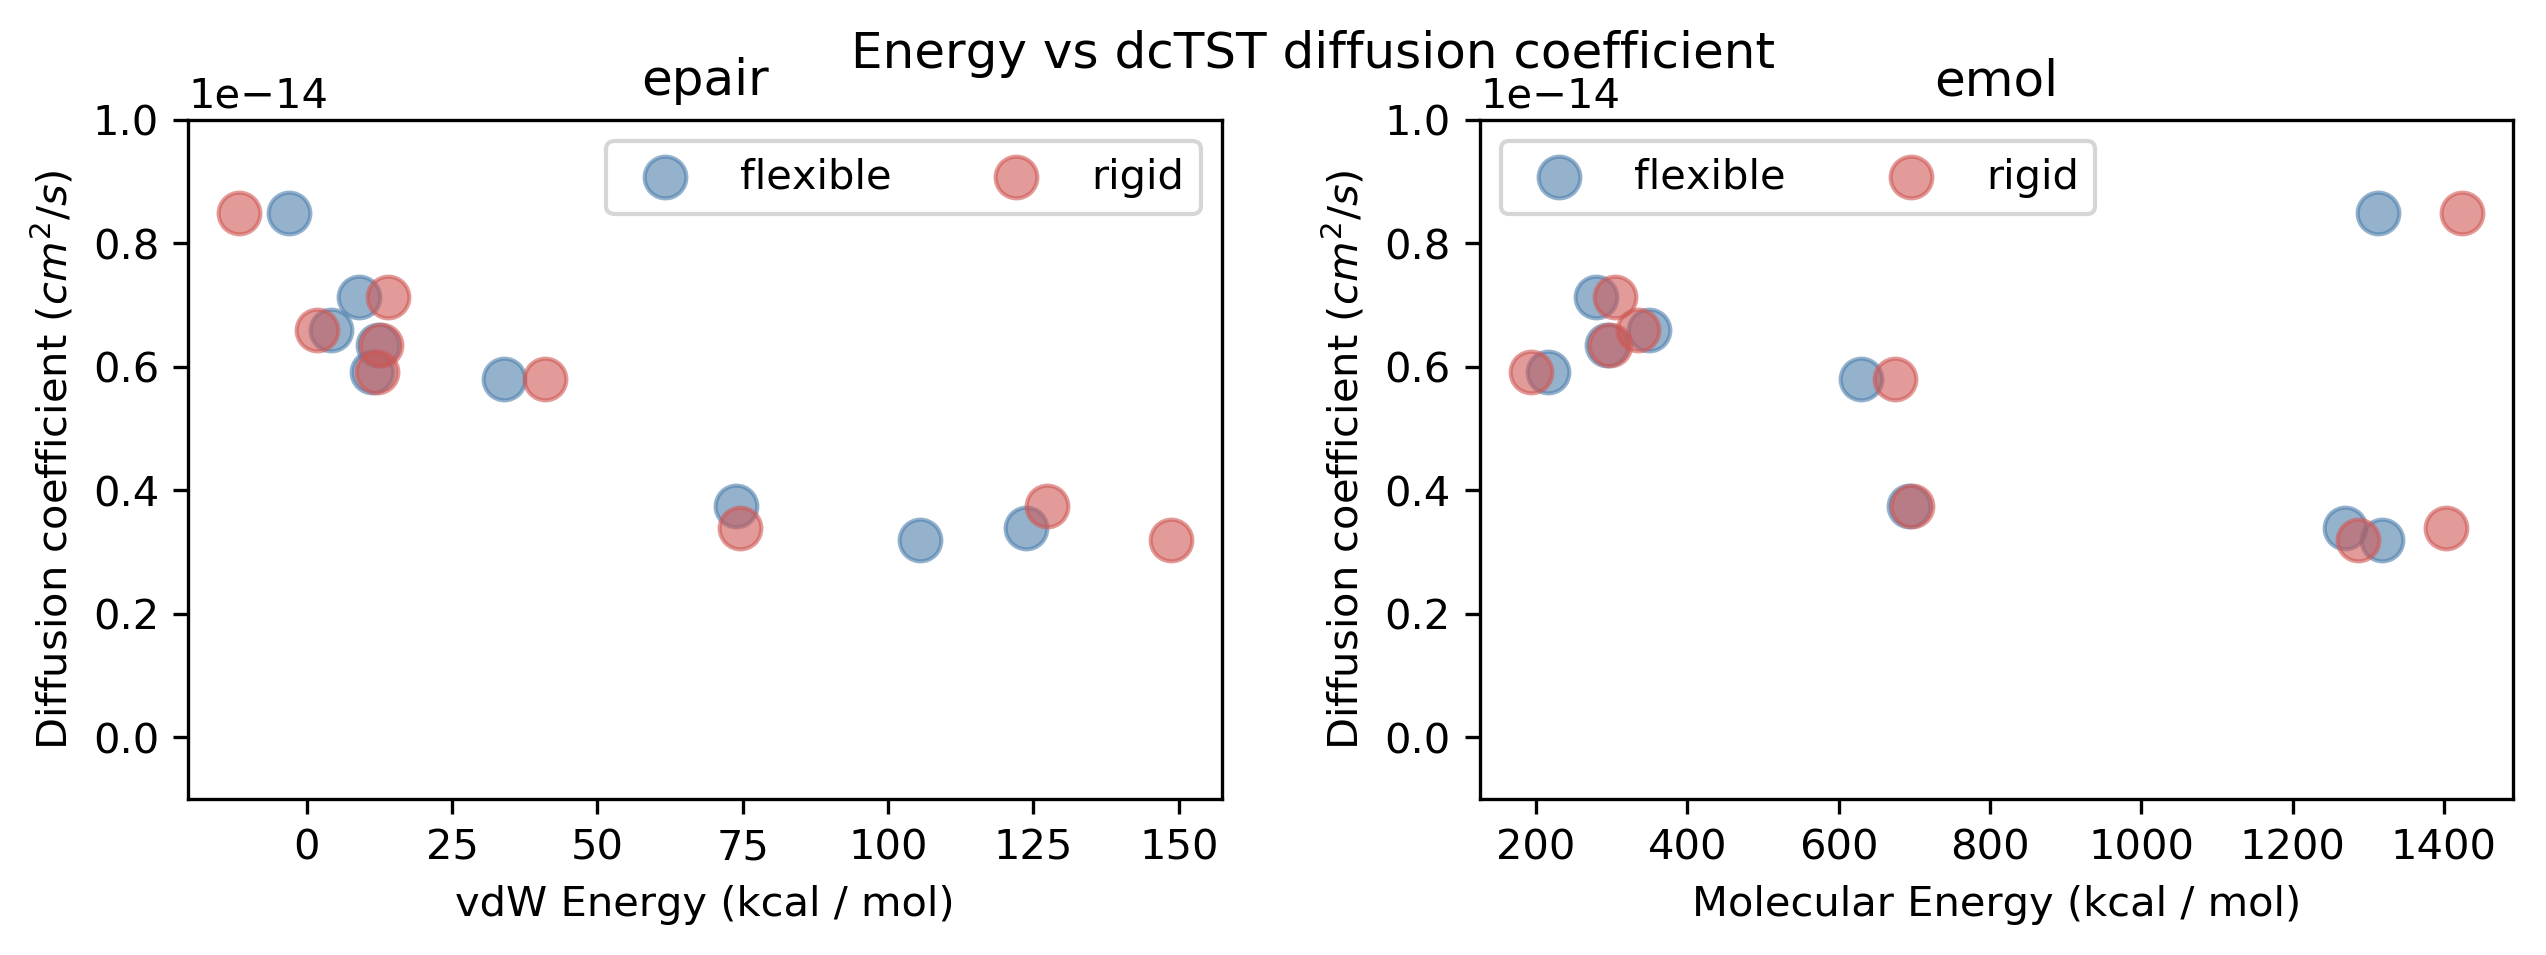

In [71]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
xlabels = ['vdW Energy (kcal / mol)', 'Molecular Energy (kcal / mol)']

for idx, eng in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    for sim_type in ['flexible', 'rigid']:
        energy = [thermo_avg[eng][m][sim_type]for m in molecules]
        ax.scatter(energy, D['dctst'], c=colors[sim_type], alpha=0.6, s=100)
#         fit_fn = np.poly1d(np.polyfit(mw, energy, 1)) 
#         ax.plot(mw, fit_fn(mw), '--', c=shades[sim_type])
    ax.set_ylim(-1e-15, 1e-14)
    ax.set_title(eng)
    ax.set_xlabel(xlabels[idx - 1])
    ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
    ax.legend(['flexible', 'rigid'], ncol=2)
plt.suptitle('Energy vs dcTST diffusion coefficient')

Text(0.5,0.98,'Energy vs dcTST diffusion coefficient')

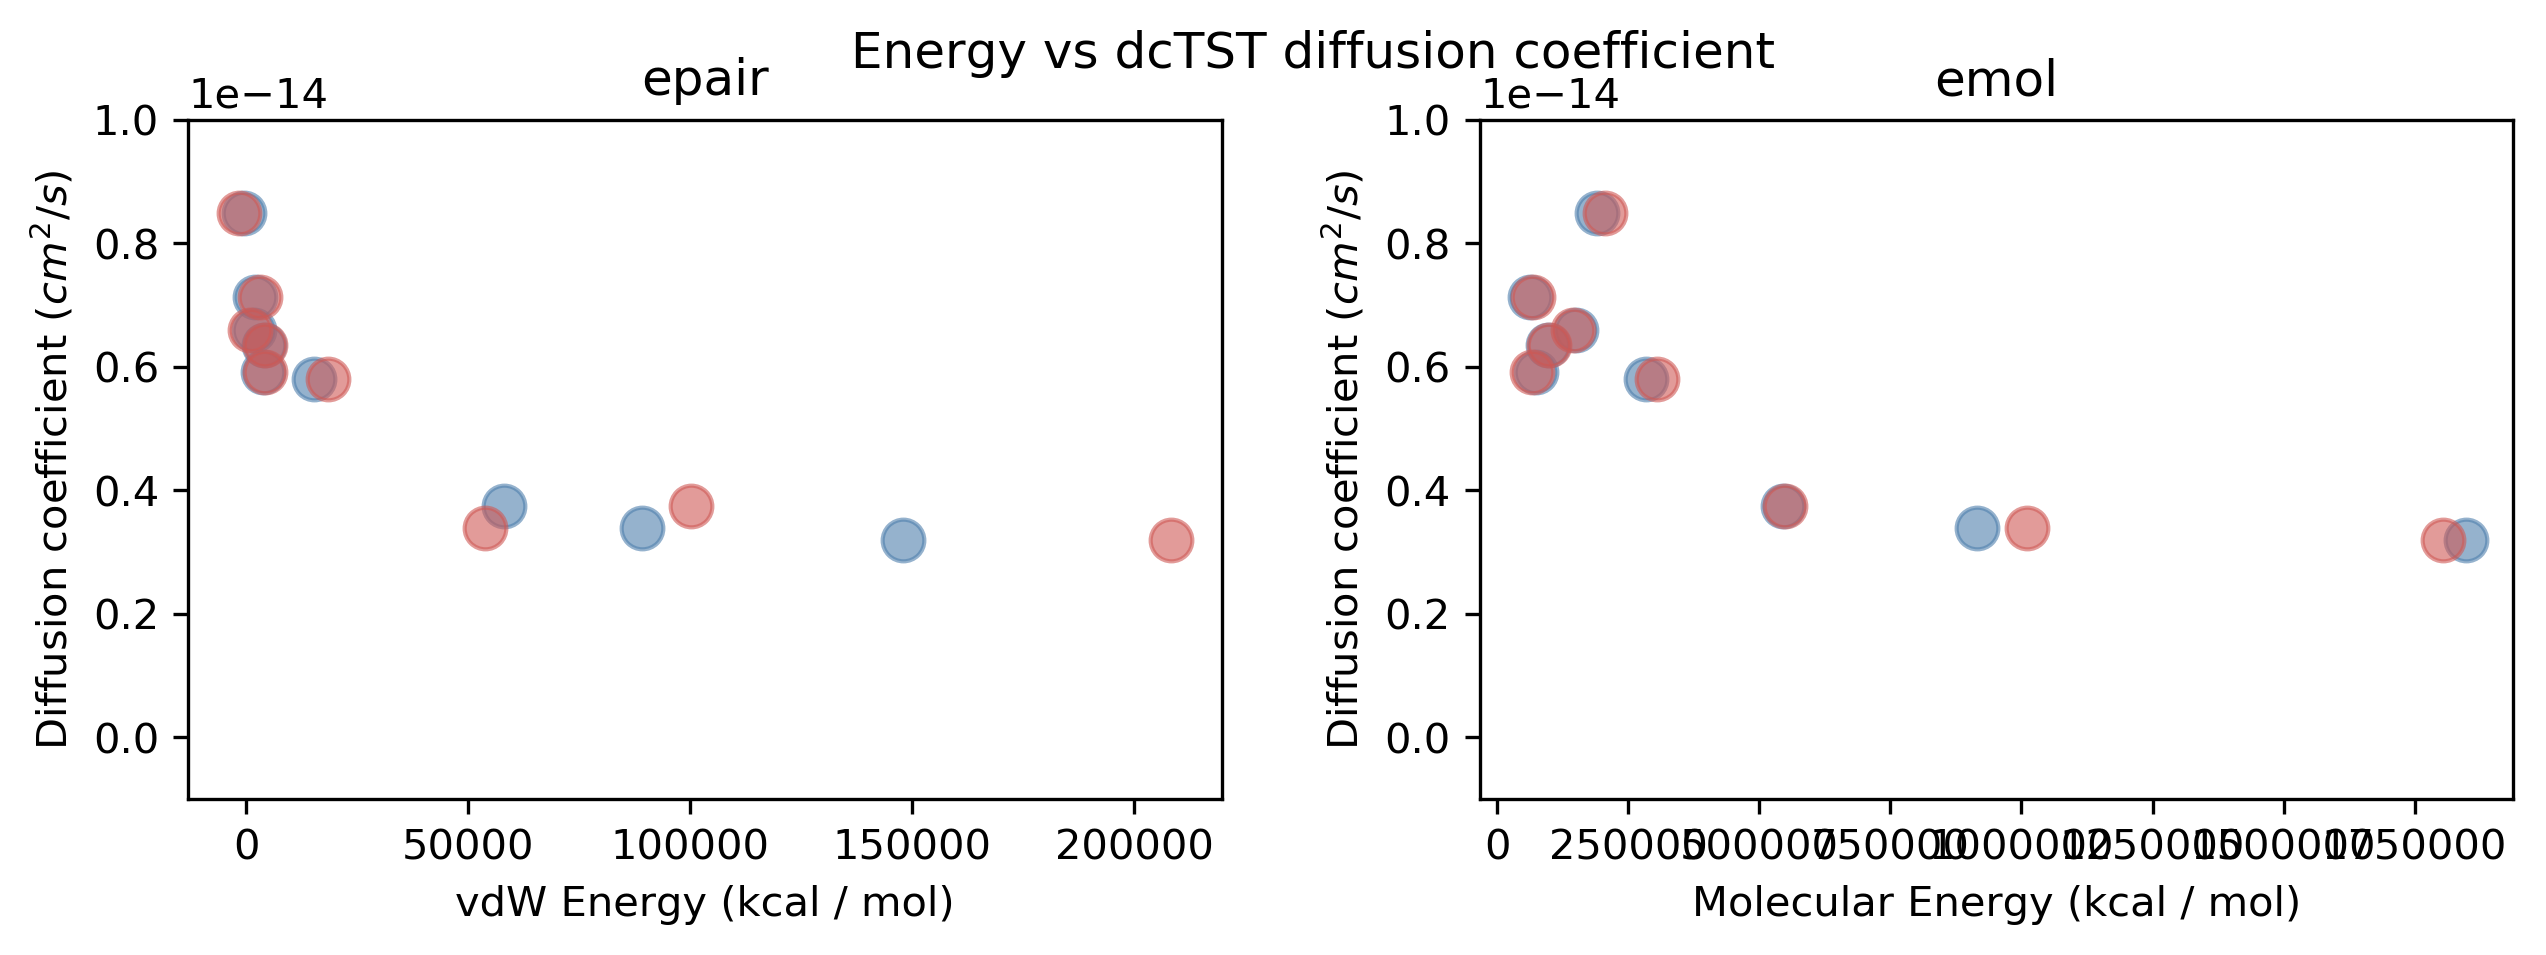

In [107]:
fig = plt.figure(figsize=(10, 3), dpi=300)
fig.subplots_adjust(wspace=0.25, hspace=0.35)
xlabels = ['vdW Energy (kcal / mol)', 'Molecular Energy (kcal / mol)']

for idx, eng in enumerate(['epair', 'emol'], start=1):
    ax = fig.add_subplot(1, 2, idx)
    for sim_type in ['flexible', 'rigid']:
        energy = [thermo_avg[eng][m][sim_type]for m in molecules]
        kbs = np.array(energy) * np.array(mw)
        ax.scatter(kbs, D['dctst'], c=colors[sim_type], alpha=0.6, s=100)
#         fit_fn = np.poly1d(np.polyfit(mw, energy, 1)) 
#         ax.plot(mw, fit_fn(mw), '--', c=shades[sim_type])
    ax.set_ylim(-1e-15, 1e-14)
    ax.set_title(eng)
    ax.set_xlabel(xlabels[idx - 1])
    ax.set_ylabel('Diffusion coefficient $(cm^2/s)$')
    # ax.legend(['flexible', 'rigid'], ncol=2)
plt.suptitle('Energy vs dcTST diffusion coefficient')